In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb

I will now load the dataset ma devo capire che sto a fa


In [2]:
names=["class label", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi",
                     "lepton 2 pT", "lepton 2 eta", "lepton 2 phi",
                     "missing energy magnitude", "missing energy phi", 
                     "MET_rel", "axial MET","M_R", "M_TR_2", "R", "MT2", "S_R",
                     "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]
df = pd.read_csv('SUSY.csv', 
                 encoding='utf-8', 
                 comment='#',
                 sep=',',
                 names=names)
df.head(10)

,class label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
5,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044
6,0.0,0.437818,-1.119883,-1.336823,0.502320,-1.717515,1.017067,0.215619,-0.461200,0.323671,0.173626,0.411898,0.370525,0.798260,0.671369,0.385910,0.515522,0.479110,0.029058
7,0.0,0.571656,0.205696,0.425950,0.578514,0.927399,-1.101478,0.116555,1.549753,0.174421,0.223450,0.523164,0.289889,0.491710,0.334593,0.514246,0.268207,0.315795,0.125728
8,1.0,2.112812,0.742983,-0.330539,0.805253,-0.028887,-1.446679,2.299946,1.450429,2.989110,-1.894770,1.445125,2.548166,1.564721,2.393632,1.554566,2.148468,1.179117,0.688057
9,0.0,1.001869,-0.471788,0.555614,1.233368,1.255548,-1.052491,0.437615,-1.333052,0.326858,-0.111678,1.435708,0.755201,0.466779,0.454541,1.446331,0.592259,1.325197,0.083014


I want to study three different models of classification: with just low-level features (first 8), with just high-level (last 10) and with both of them. Hence i'll define different arrays.

In [3]:
#All features
x=df.iloc[:,1:]
x = x.values

#low-level features
x_low=df.iloc[:,1:9]
x_low = x_low.values

#high-level features
x_high=df.iloc[:,10:]
x_high = x_high.values

#target
y = df["class label"].values


Below low-level variable are plotted. Those shows some distinguishing characteristic of the events.

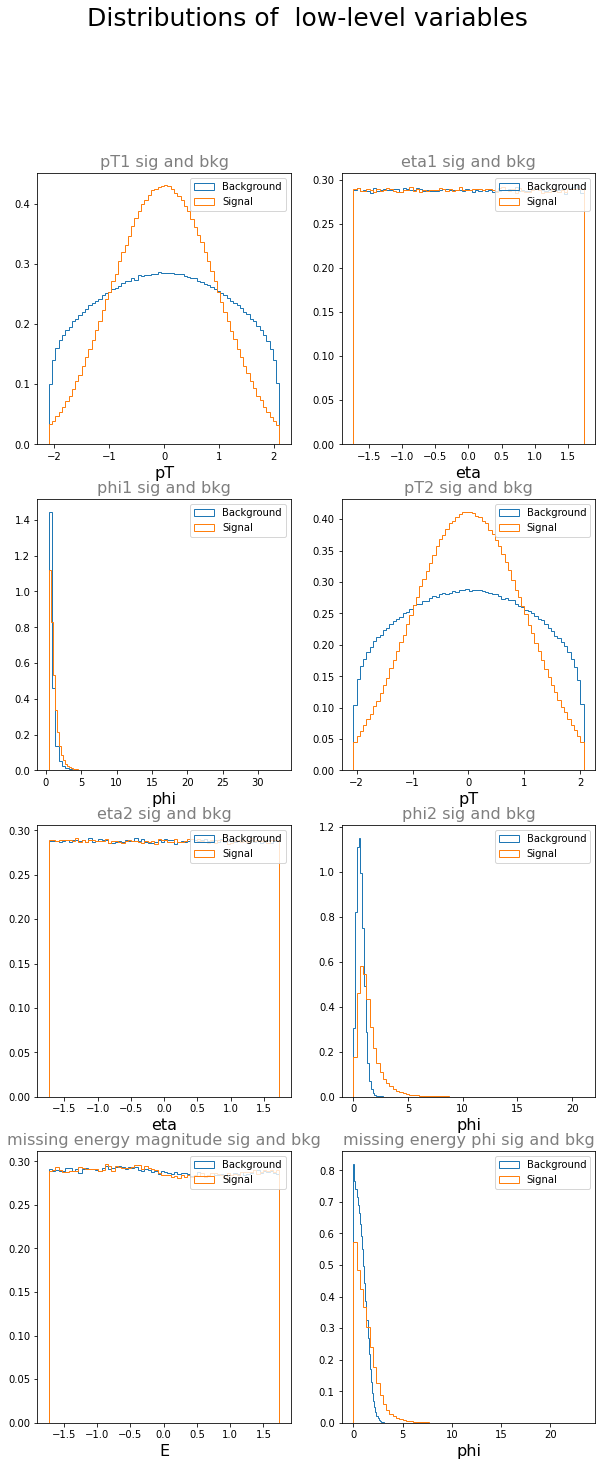

In [4]:
fig, axL = plt.subplots(4,2, figsize=(10,23))
axL[0,0].hist(x[:,1][y==0], density=True,histtype='step', bins=70, label='Background')
axL[0,0].hist(x[:,1][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[0,0].set_title("pT1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[0,0].set_xlabel('pT',  fontsize = 16, color = 'black', alpha = 1)


axL[0,1].hist(x[:,2][y==0], density=True,histtype='step', bins=70, label='Background')
axL[0,1].hist(x[:,2][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[0,1].set_title("eta1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[0,1].set_xlabel('eta',  fontsize = 16, color = 'black', alpha = 1)

axL[1,0].hist(x[:,3][y==0], density=True,histtype='step', bins=70, label='Background')
axL[1,0].hist(x[:,3][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[1,0].set_title("phi1 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[1,0].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

axL[1,1].hist(x[:,4][y==0], density=True,histtype='step', bins=70, label='Background')
axL[1,1].hist(x[:,4][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[1,1].set_title("pT2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[1,1].set_xlabel('pT',  fontsize = 16, color = 'black', alpha = 1)

axL[2,0].hist(x[:,5][y==0], density=True,histtype='step', bins=70, label='Background')
axL[2,0].hist(x[:,5][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[2,0].set_title("eta2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[2,0].set_xlabel('eta',  fontsize = 16, color = 'black', alpha = 1)


axL[2,1].hist(x[:,6][y==0], density=True,histtype='step', bins=70, label='Background')
axL[2,1].hist(x[:,6][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[2,1].set_title("phi2 sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[2,1].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

axL[3,0].hist(x[:,7][y==0], density=True,histtype='step', bins=70, label='Background')
axL[3,0].hist(x[:,7][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[3,0].set_title("missing energy magnitude sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[3,0].set_xlabel('E',  fontsize = 16, color = 'black', alpha = 1)

axL[3,1].hist(x[:,8][y==0], density=True,histtype='step', bins=70, label='Background')
axL[3,1].hist(x[:,8][y==1], density=True,histtype='step', bins=70, label='Signal')
axL[3,1].set_title("missing energy phi sig and bkg", fontsize = 16, color = 'black', alpha = .5)                        
axL[3,1].set_xlabel('phi',  fontsize = 16, color = 'black', alpha = 1)

plt.suptitle('Distributions of  low-level variables', fontsize=25)
axL[0,0].legend()
axL[0,1].legend()
axL[1,0].legend()
axL[1,1].legend()
axL[2,0].legend()
axL[2,1].legend()
axL[3,0].legend()
axL[3,1].legend()



plt.show()


In [5]:
class_counts= df.groupby('class label').size()
print(class_counts)



#all
x_train, x_test, y_train, y_test = train_test_split(x,y,
                            test_size=0.4,
                             random_state=42,stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



#low-level
xL_train, xL_test, yL_train, yL_test = train_test_split(x_low,y,
                            test_size=0.4,
                             random_state=42,stratify=y)
xL_train, xL_val, yL_train, yL_val = train_test_split(xL_train, yL_train, test_size=0.2, random_state=42)



#high-level
xH_train, xH_test, yH_train, yH_test = train_test_split(x_high,y,
                            test_size=0.4,
                             random_state=42,stratify=y)
xH_train, xH_val, yH_train, yH_val = train_test_split(xH_train, yH_train, test_size=0.2, random_state=42)

class label
0.0    2712173
1.0    2287827
dtype: int64


I will now scale the datasets

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

xL_train = scaler.fit_transform(xL_train)
xL_val = scaler.transform(xL_val)
xL_test = scaler.transform(xL_test)

xH_train = scaler.fit_transform(xH_train)
xH_val = scaler.transform(xH_val)
xH_test = scaler.transform(xH_test)

# I use xgboost to build up my model, hence i build two matrices for train and test.
dtrain = xgb.DMatrix(x_train,y_train)
dval = xgb.DMatrix(x_val,y_val)
dtest = xgb.DMatrix(x_test,y_test)

dtrainL = xgb.DMatrix(xL_train,yL_train)
dvalL = xgb.DMatrix(xL_val,yL_val)
dtestL = xgb.DMatrix(xL_test,yL_test)

dtrainH = xgb.DMatrix(xH_train,yH_train)
dvalH = xgb.DMatrix(xH_val,yH_val)
dtestH = xgb.DMatrix(xH_test,yH_test)

I need to find the best parameters in order to have the best model which minimize the error. To do that i perform cross validation trying different values of parameters in selected ranges. I start searching for max_depth, min_child_weight which helps in fixing the complexity and controlling overfit of the model. I'll consider the dataset with all the variables.

In [ ]:
param = { }
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "error"
num_round = 70

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(8,11) # i saw that 15 makes it to overfit, after some rounds the error starts to increase
    for min_child_weight in range(6,8)
]
# Define initial best params and error
min_err = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
# Update our parameters
    param['max_depth'] = max_depth
    param['min_child_weight'] = min_child_weight
# Run CV
    cv_results = xgb.cv(
        param,
        dtrain,
        num_boost_round=num_round,
        seed=42,
        nfold=3, # 5 was too long, choose this beacause the sample is large and it takes too much time
        metrics={'error'},
        early_stopping_rounds=6
    )
# Update best error
    mean_err = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError: {} for {} rounds".format(mean_err, boost_rounds))
    if mean_err < min_err:
        min_err = mean_err
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Error: {}".format(best_params[0], best_params[1], min_err)) 

CV with max_depth=8, min_child_weight=6

        Error: 0.19779233333333335 for 41 rounds
        
CV with max_depth=8, min_child_weight=7
        
        Error: 0.19782666666666668 for 37 rounds
        
CV with max_depth=9, min_child_weight=6
        
        Error: 0.19779233333333335 for 31 rounds
        
CV with max_depth=9, min_child_weight=7
        
        Error: 0.19772333333333333 for 46 rounds
        
CV with max_depth=10, min_child_weight=6
        
        Error: 0.19784933333333332 for 28 rounds
        
CV with max_depth=10, min_child_weight=7
        
        Error: 0.197859 for 37 rounds
        
Best params: 9, 7, Error: 0.19772333333333333

Hence i save these best parmeters and with another cross validation i find the best learning rate:

In [ ]:
min_err = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    param={}
    param['max_depth'] = 9
    param['min_child_weight'] = 6
    param['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            param,
            dtrain,
            num_boost_round=70,
            seed=42,
            nfold=3,
            metrics=['error'],
            early_stopping_rounds=6
          )
    # Update best score
    mean_err = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds\n".format(mean_err, boost_rounds))
    if mean_err < min_err:
        min_err = mean_err
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_err))

CV with eta=0.3
        
        Error 0.19779233333333335 for 31 rounds

CV with eta=0.2
        
        Error 0.19726033333333334 for 61 rounds

CV with eta=0.1
        
        Error 0.19706733333333334 for 68 rounds

CV with eta=0.05
       
        Error 0.19823266666666664 for 69 rounds

Best params: 0.1, Error: 0.19706733333333334

Now that i have found the best parameters, i complete the study of my model with a final CV wth all the parameters chosen, using now as a metric the AUC as is the most common for classification problems, in particular as i want to compare different algortihms.

In [20]:
param = {'max_depth': 9, 'eta': 0.1, "min_child_weight": 7}
param['objective'] ='binary:logistic' 
param['eval_metric'] = "auc" 
num_round = 70 
# Run CV
cv_final = xgb.cv(
        param,
        dtrain,
        num_boost_round=num_round,
        seed=42,
        nfold=3, # 5 was too long, choose this beacause the sample is large and it takes less time
        metrics={'auc'},
        early_stopping_rounds=6
    )
print(cv_final)

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.859319       0.000346       0.857406      0.000370
1         0.863349       0.000392       0.861364      0.000387
2         0.865370       0.000384       0.863308      0.000587
3         0.866403       0.000403       0.864318      0.000465
4         0.867309       0.000363       0.865181      0.000402
..             ...            ...            ...           ...
65        0.880683       0.000161       0.876044      0.000404
66        0.880744       0.000164       0.876069      0.000403
67        0.880783       0.000155       0.876078      0.000401
68        0.880849       0.000160       0.876097      0.000403
69        0.880919       0.000193       0.876127      0.000394

[70 rows x 4 columns]


I have now the best model for the BDT considering all the variables, hence i can train and test it. Early stopping helps in avoiding overfitting.

In [7]:
evallist = [(dval, 'eval'), (dtrain, 'train')]
param = {'max_depth': 9, 'eta': 0.1, "min_child_weight": 7}
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "auc" #auc,rmse,roc. This evaluate how good the model is. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
num_round = 70 #low eta means larger num_round
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=6)

print("Best AUC: {:.3f} with {} rounds".format(
                 bst.best_score,
                 bst.best_iteration+1))

[0]	eval-auc:0.85737	train-auc:0.85878
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 6 rounds.
[1]	eval-auc:0.86160	train-auc:0.86309
[2]	eval-auc:0.86330	train-auc:0.86481
[3]	eval-auc:0.86444	train-auc:0.86597
[4]	eval-auc:0.86514	train-auc:0.86676
[5]	eval-auc:0.86601	train-auc:0.86761
[6]	eval-auc:0.86680	train-auc:0.86846
[7]	eval-auc:0.86730	train-auc:0.86900
[8]	eval-auc:0.86794	train-auc:0.86968
[9]	eval-auc:0.86823	train-auc:0.87004
[10]	eval-auc:0.86877	train-auc:0.87059
[11]	eval-auc:0.86913	train-auc:0.87097
[12]	eval-auc:0.86952	train-auc:0.87141
[13]	eval-auc:0.86996	train-auc:0.87188
[14]	eval-auc:0.87030	train-auc:0.87226
[15]	eval-auc:0.87067	train-auc:0.87266
[16]	eval-auc:0.87096	train-auc:0.87299
[17]	eval-auc:0.87130	train-auc:0.87338
[18]	eval-auc:0.87154	train-auc:0.87366
[19]	eval-auc:0.87179	train-auc:0.87395
[20]	eval-auc:0.87208	train-auc:0.87428
[21]	eval-auc:0.87236	train-

In [8]:
y_pred = bst.predict(dtest)
print(roc_auc_score(y_test,y_pred))

0.8764658988073479


Let's now mantein the same hyperparameters for the model but changing the dataset, in particular considering before the low level features and then the high ones, in order to see if those last add more information with respect to the most intuitive ones.

In [9]:
evallist = [(dvalL, 'eval'), (dtrainL, 'train')]

param = {'max_depth': 9, 'eta': 0.1, "min_child_weight": 7}
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "auc" #auc,rmse,roc. This evaluate how good the model is. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
num_round = 70 #low eta means larger num_round

bstL = xgb.train(param, dtrainL, num_round, evallist, early_stopping_rounds=6)

print("Best AUC: {:.3f} with {} rounds".format(
                 bstL.best_score,
                 bstL.best_iteration+1))

[0]	eval-auc:0.84968	train-auc:0.85132
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 6 rounds.
[1]	eval-auc:0.85155	train-auc:0.85303
[2]	eval-auc:0.85275	train-auc:0.85424
[3]	eval-auc:0.85358	train-auc:0.85504
[4]	eval-auc:0.85396	train-auc:0.85547
[5]	eval-auc:0.85442	train-auc:0.85593
[6]	eval-auc:0.85470	train-auc:0.85627
[7]	eval-auc:0.85499	train-auc:0.85658
[8]	eval-auc:0.85530	train-auc:0.85691
[9]	eval-auc:0.85555	train-auc:0.85718
[10]	eval-auc:0.85573	train-auc:0.85740
[11]	eval-auc:0.85598	train-auc:0.85766
[12]	eval-auc:0.85616	train-auc:0.85787
[13]	eval-auc:0.85633	train-auc:0.85805
[14]	eval-auc:0.85647	train-auc:0.85823
[15]	eval-auc:0.85664	train-auc:0.85845
[16]	eval-auc:0.85681	train-auc:0.85864
[17]	eval-auc:0.85694	train-auc:0.85880
[18]	eval-auc:0.85705	train-auc:0.85896
[19]	eval-auc:0.85720	train-auc:0.85912
[20]	eval-auc:0.85730	train-auc:0.85925
[21]	eval-auc:0.85744	train-

In [18]:
y_predL = bstL.predict(dtestL)
print(roc_auc_score(yL_test,y_predL))

0.8619621709471791


In [13]:
evallist = [(dvalH, 'eval'), (dtrainH, 'train')]

param = {'max_depth': 9, 'eta': 0.1, "min_child_weight": 7}
param['objective'] ='binary:logistic' #good for classification
param['eval_metric'] = "auc" #auc,rmse,roc. This evaluate how good the model is. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
num_round = 70 #low eta means larger num_round

bstH = xgb.train(param, dtrainH, num_round, evallist, early_stopping_rounds=6)

print("Best AUC: {:.3f} with {} rounds".format(
                 bstH.best_score,
                 bstH.best_iteration+1))

[0]	eval-auc:0.84709	train-auc:0.84803
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 6 rounds.
[1]	eval-auc:0.85062	train-auc:0.85160
[2]	eval-auc:0.85270	train-auc:0.85366
[3]	eval-auc:0.85328	train-auc:0.85433
[4]	eval-auc:0.85442	train-auc:0.85547
[5]	eval-auc:0.85518	train-auc:0.85630
[6]	eval-auc:0.85570	train-auc:0.85680
[7]	eval-auc:0.85608	train-auc:0.85717
[8]	eval-auc:0.85646	train-auc:0.85754
[9]	eval-auc:0.85713	train-auc:0.85824
[10]	eval-auc:0.85741	train-auc:0.85851
[11]	eval-auc:0.85767	train-auc:0.85880
[12]	eval-auc:0.85799	train-auc:0.85916
[13]	eval-auc:0.85822	train-auc:0.85940
[14]	eval-auc:0.85855	train-auc:0.85976
[15]	eval-auc:0.85888	train-auc:0.86013
[16]	eval-auc:0.85910	train-auc:0.86037
[17]	eval-auc:0.85929	train-auc:0.86059
[18]	eval-auc:0.85942	train-auc:0.86074
[19]	eval-auc:0.85964	train-auc:0.86099
[20]	eval-auc:0.85983	train-auc:0.86120
[21]	eval-auc:0.86002	train-

In [19]:
y_predH = bstH.predict(dtestH)
print(roc_auc_score(yH_test,y_predH))

0.8624062608091718


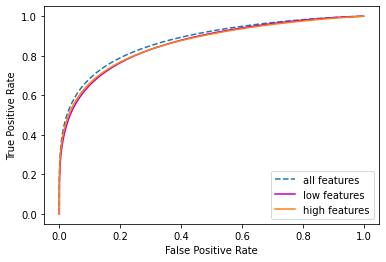

all features AUC: 0.876
low features AUC: 0.862
high features AUC: 0.862


In [21]:
# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, y_pred)
fprL, tprL, _ = roc_curve(y_test, y_predL)
fprH, tprH, _ = roc_curve(y_test, y_predH)

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--', label='all features')
plt.plot(fprL, tprL, color='m', label='low features')
plt.plot(fprH, tprH, label='high features')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

auc = roc_auc_score(y_test, y_pred)
aucL = roc_auc_score(yL_test, y_predL)
aucH = roc_auc_score(yH_test, y_predH)
print("all features AUC: %.3f" % auc)
print("low features AUC: %.3f" % aucL) 
print("high features AUC: %.3f" % aucH) 